In [1]:
import pandas as pd
import urllib as ul
import numpy as np
# from Bio import Entrez
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [74]:
def draw(df, title, genes, hits):
    df.columns = ['index', 'Category name (Accession)', 'genes', 'p1', 'p2']
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize'] = (12.0, 8.0)
    plt.rcParams["patch.force_edgecolor"] = True

    # create a color palette the length of the dataframe
    colors = sns.color_palette('husl', n_colors=len(df))

    # plot
    p = sns.barplot(x=df.index, y='genes', data=df, palette=colors)

    # create color map with colors and df.names
    cmap = dict(zip(df['Category name (Accession)'], colors))

    # create the rectangles for the legend
    patches = [Patch(color=v, label=k) for k, v in cmap.items()]

    # add the legend
    plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)

    # for i in p.containers:
    #     s = str(i)
    #     p.bar_label(i,)
    for c in p.containers:
        # set the bar label based on the y-axis
        p.bar_label(c, label_type='center', padding=1)
        # add an annotations with custom labels
        p.bar_label(c, labels=df.p1, label_type='edge', padding=15)
        p.bar_label(c, labels=df.p2, label_type='edge', padding=5)

    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Genes', fontsize=14)
    plt.title('Total # Genes:{}    Total # process hits:{}'.format(genes, hits), fontsize=16)
    plt.suptitle(title, fontsize=20, y=1)
    plt.show()

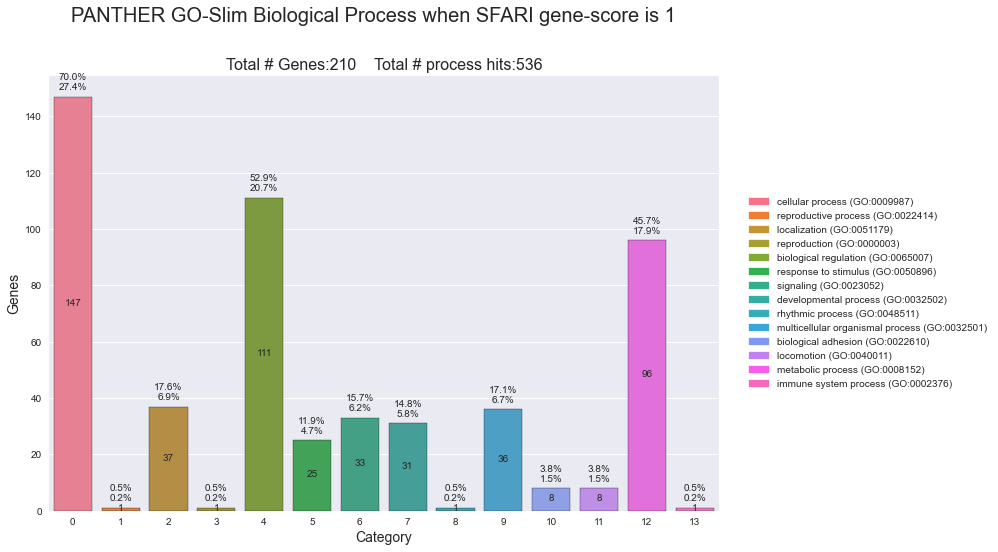

In [76]:
GO_BP_s1 = pd.read_csv('GO_BP_s1.txt', sep='\t', header=None)

draw(GO_BP_s1, 'PANTHER GO-Slim Biological Process when SFARI gene-score is 1',210, 536)

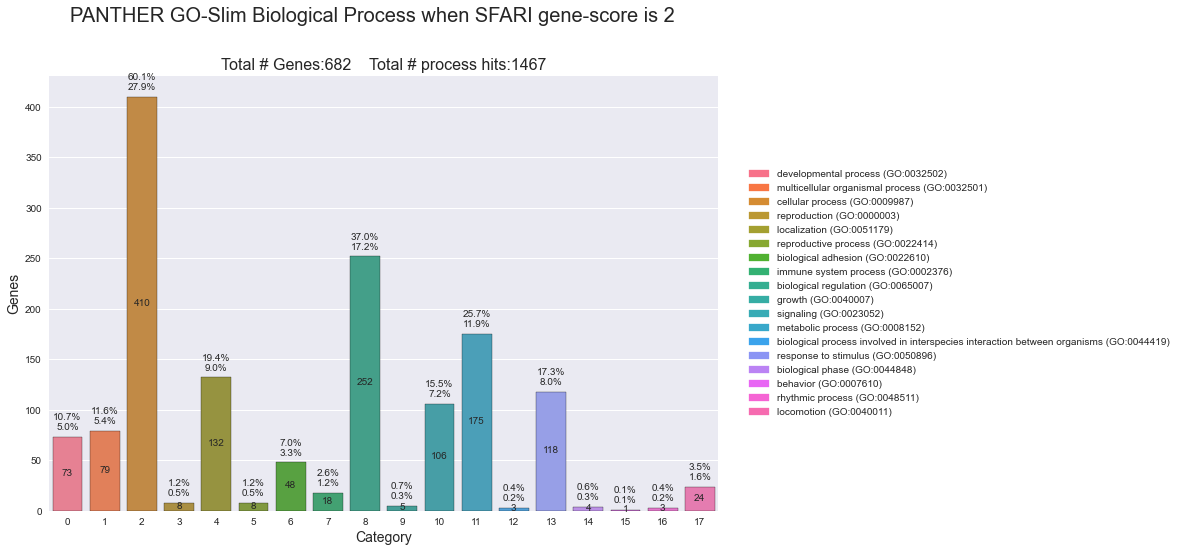

In [77]:
GO_BP_s2 = pd.read_csv('GO_BP_s2.txt', sep='\t', header=None)
genes = 682
hits = 1467

draw(GO_BP_s2, 'PANTHER GO-Slim Biological Process when SFARI gene-score is 2',genes, hits)

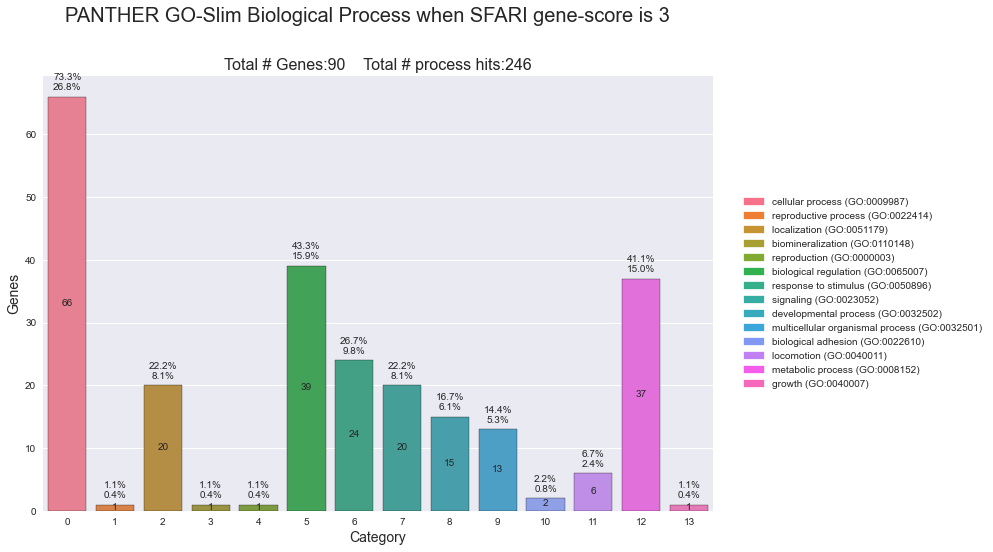

In [78]:
GO_BP_s3 = pd.read_csv('GO_BP_s3.txt', sep='\t', header=None)
genes = 90
hits = 246

draw(GO_BP_s3, 'PANTHER GO-Slim Biological Process when SFARI gene-score is 3',genes, hits)

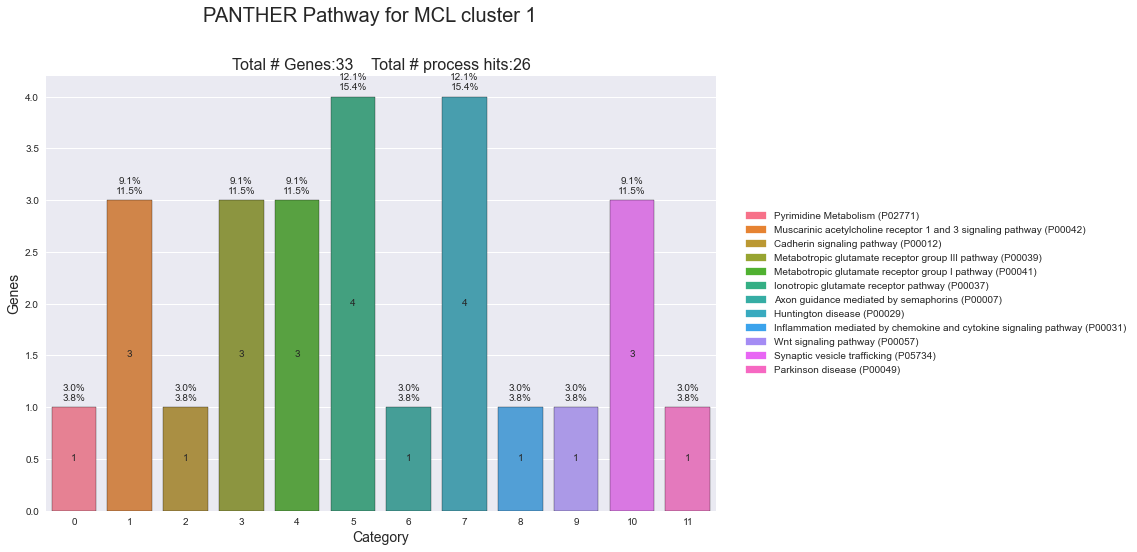

In [79]:
GO_p_c1 = pd.read_csv('GO_P_c1.txt', sep='\t', header=None)
genes = 33
hits = 26

draw(GO_p_c1, 'PANTHER Pathway for MCL cluster 1',genes, hits)

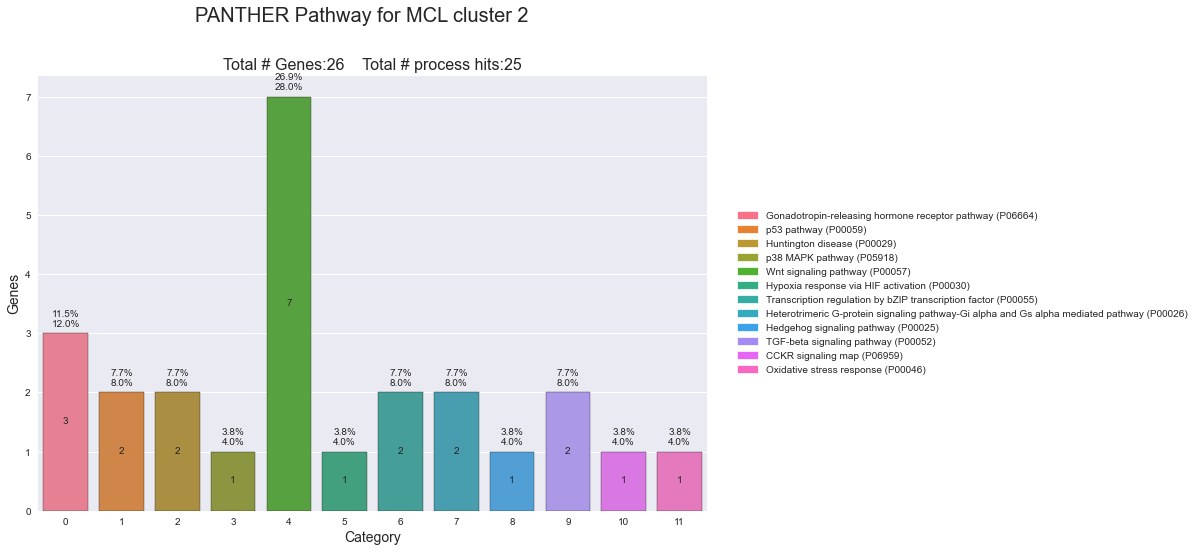

In [80]:
GO_p_c2 = pd.read_csv('GO_P_c2.txt', sep='\t', header=None)
genes = 26
hits = 25

draw(GO_p_c2, 'PANTHER Pathway for MCL cluster 2',genes, hits)